In [104]:
from optimizers.simulations.order import simulate_from_order_func
from sklearn.model_selection import train_test_split
from optimizers.utils._utils import get_csv_data
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
opens = get_csv_data("data/fileos_hourly_opens.csv")
closes = get_csv_data("data/fileos_hourly_closes.csv")

train_opens, opens = train_test_split(opens, test_size=0.30, train_size=0.70, shuffle=False)
train_closes, closes = train_test_split(closes, test_size=0.30, train_size=0.70, shuffle=False)

In [112]:
# CHZ -> WIN 50 2.6 -2.9 0.3 1e-6 1.5 LOG
# FIL -> DASH 110 2.2 -2.3 1.1 1.000000e-09 0.4

PERIOD = 10
UPPER = 2.2
LOWER = -2.1
EXIT = 0.2
DELTA = 1e-5
VT = 0.7
BURNIN = 500
MODEL = "cummlog"

In [113]:
pf = simulate_from_order_func(
    closes, opens,
    period=PERIOD,
    upper=UPPER,
    lower=LOWER,
    exit=EXIT,
    delta=DELTA,
    vt=VT,
    burnin=BURNIN,
    freq="h",
    hedge="beta",
    mode=MODEL,
    slippage=0.0008,
    commission=0.0008,
    order_size=0.10,
)

-0.02895241410181141


<AxesSubplot:xlabel='time'>

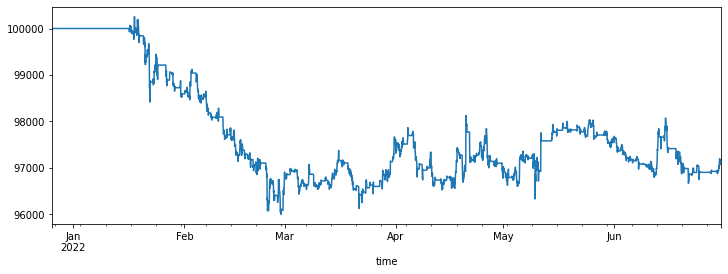

In [114]:
print(pf.total_return())

pf.value().plot(figsize=(12,4))

In [115]:
res = pf.trades.records_readable.groupby("Entry Timestamp").sum()

print(f"Total trades: {res.shape[0]}")
print(f"Executed trades: {pf.trades.records_readable.shape[0]}")
print(f"Net long-short win rate: {res.PnL[res.PnL > 0].shape[0] / res.shape[0] * 100:.2f}%")
print(f"Median trade profit: {res.PnL.median():.2f}")
print(f"Mean trade profit: {res.PnL.mean():.2f}")
print(f"STD of trade profit: {res.PnL.std():.2f}")

Total trades: 144
Executed trades: 288
Net long-short win rate: 47.92%
Median trade profit: -4.98
Mean trade profit: -20.11
STD of trade profit: 238.38


<AxesSubplot:xlabel='Entry Timestamp'>

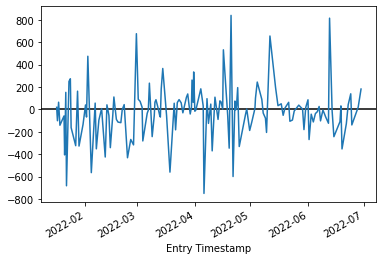

In [116]:
plt.axhline(0, color="black")
res.PnL.plot()

In [117]:
pf.stats()

Start                               2021-12-26 00:00:00
End                                 2022-06-30 23:00:00
Period                                187 days 00:00:00
Start Value                                    100000.0
End Value                                   97104.75859
Total Return [%]                              -2.895241
Benchmark Return [%]                         -79.024698
Max Gross Exposure [%]                        11.052775
Total Fees Paid                             2899.777047
Max Drawdown [%]                               4.246919
Max Drawdown Duration                 163 days 21:00:00
Total Trades                                        288
Total Closed Trades                                 288
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  48.263889
Best Trade [%]                                15.840205
Worst Trade [%]                               -1